# Medidas de dispersión y test de ANOVA

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Agosto de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene la explicación inicial de la forma de calcular las medidas estadísticas de dispersión y un test estadíctico (ANOVA).

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (2.02)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
np.random.seed(29)
grupo_A = np.random.normal(loc=50, scale=5, size=30)  # media = 50
grupo_B = np.random.normal(loc=55, scale=5, size=30)  # media = 55
grupo_C = np.random.normal(loc=60, scale=5, size=30)  # media = 60

In [ ]:
# Armar DataFrame
data = pd.DataFrame({
    "valor": np.concatenate([grupo_A, grupo_B, grupo_C]),
    "grupo": ["A"]*30 + ["B"]*30 + ["C"]*30
})

# Medidas de dispersión

Ayudan a entender cómo se distribuyen los datos

In [ ]:
# Función para calcular medidas de dispersión de un grupo
def medidas_dispersion(datos):
    rango = np.max(datos) - np.min(datos)
    varianza = np.var(datos, ddof=1)  # ddof=1 para varianza muestral
    desviacion = np.std(datos, ddof=1)
    cv = (desviacion / np.mean(datos)) * 100
    return {
        "Rango": rango,
        "Varianza": varianza,
        "Desviación Estándar": desviacion,
        "Coeficiente de Variación (%)": cv
    }

# Calcular para cada grupo
disp_A = medidas_dispersion(grupo_A)
disp_B = medidas_dispersion(grupo_B)
disp_C = medidas_dispersion(grupo_C)

# Mostrar en un DataFrame comparativo
disp_df = pd.DataFrame([disp_A, disp_B, disp_C], index=["Grupo A", "Grupo B", "Grupo C"]).round(2)
print("Medidas de dispersión por grupo:")
display(disp_df)


Medidas de dispersión por grupo:


,Rango,Varianza,Desviación Estándar,Coeficiente de Variación (%)
Grupo A,21.30,27.30,5.22,10.20
Grupo B,25.70,42.64,6.53,12.12
Grupo C,25.43,26.29,5.13,8.57


Las medidas de dispersión indican cuánto se alejan los datos de la media o del centro. Sirven para evaluar la variabilidad de los datos.

**Rango**

Diferencia entre el valor máximo y mínimo.

Ejemplo: si las notas van de 40 a 65, el rango es 25.

**Varianza ($\sigma^2$ o $s^2$)**

+ Promedio de las desviaciones cuadráticas respecto de la media.

+ Mientras mayor sea, más dispersos están los datos.

**Desviación estándar ($\sigma$ o s)**

+ Raíz cuadrada de la varianza.

+ Se mide en las mismas unidades que los datos, por lo que es más interpretable.

**Coeficiente de variación (CV)**

+ Relación entre la desviación estándar y la media, expresada en %.

+ Sirve para comparar la variabilidad relativa entre grupos con escalas distintas.

# Test de ANOVA

**ANOVA (Analysis of Variance)** es una prueba estadística que permite comparar las medias de 3 o más grupos para ver si existen diferencias significativas entre ellas.

**Hipótesis:**
+ $H_0$: Todas las medias son iguales.
+ $H_1$: Al menos una media es diferente.

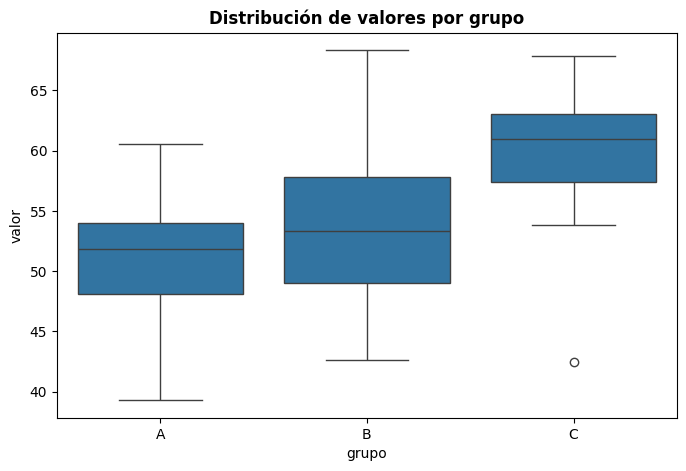

Estadístico F: 18.39
p-valor: 2.1877566118200992e-07
Rechazamos H0: Hay diferencias significativas entre las medias.


In [ ]:
# Visualización de los grupos
plt.figure(figsize=(8,5))
sns.boxplot(x="grupo", y="valor", data=data, legend=False)
plt.title("Distribución de valores por grupo", fontsize=12, fontweight="bold")
plt.show()

# ANOVA con scipy
anova_result = stats.f_oneway(grupo_A, grupo_B, grupo_C)
print(f"Estadístico F: {anova_result.statistic:.2f}")
print(f"p-valor: {anova_result.pvalue}")

# 5. Interpretación
if anova_result.pvalue < 0.05:
    print("Rechazamos H0: Hay diferencias significativas entre las medias.")
else:
    print("No se rechaza H0: No hay evidencia de diferencias entre las medias.")

¿Por qué sirve para comparar tres o más medias de grupos independientes?

+ Si se tienen sólo dos grupos, el test de ANOVA se reduce matemáticamente a una prueba *t de Student* para muestras independientes.

+ En ambos casos (ANOVA con 2 grupos o t-test), el estadístico F del ANOVA es igual al cuadrado del estadístico t: $F=t^2$

Esto significa que no aporta información extra aplicar ANOVA a 2 grupos, porque es equivalente al test t.

In [ ]:
np.random.seed(29)
grupo1 = np.random.normal(50, 5, 30)
grupo2 = np.random.normal(55, 5, 30)

# t-test
t_stat, p_t = stats.ttest_ind(grupo1, grupo2)

# ANOVA con dos grupos
f_stat, p_f = stats.f_oneway(grupo1, grupo2)

print(f"t-test: t = {t_stat} p = {p_t}")
print(f"ANOVA : F = {f_stat} p = {p_f}")
print(f"Verificación: F = t^2 → {round(t_stat**2,4)} ≈ {round(f_stat,4)}")


t-test: t = -1.7390116494936625 p = 0.08733820380498684
ANOVA:  F = 3.024161517074692 p = 0.08733820380498601
Verificación: F = t^2 → 3.0242 ≈ 3.0242
